In [6]:
# Statical and Matematical libraries
import numpy as np
import pandas as pd

# Fuzzy function and Modules 
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Handling data 0
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.layers import Layer

import matplotlib.pyplot as plt

In [2]:
# Read Customers Personality Analysis Dataset
df =pd.read_excel("marketing_campaign.xlsx")
df.dropna(inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [4]:
# Drop some unnecessery columns like digital marketing camping
df = df.drop(["ID","Dt_Customer","AcceptedCmp3","AcceptedCmp1",
              "AcceptedCmp2","AcceptedCmp4","AcceptedCmp5",
              "Z_CostContact","Z_Revenue"],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   int64 

In [13]:
# print(df["Education"].value_counts())
# print("\n")
df['Education'].unique()
# print(df["Marital_Status"].value_counts())
# print("\n")

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7f7697b81de0>,
 [Text(0.3832148863643427, 1.0310898849609398, ''),
  Text(-1.094432340534013, -0.11053439280713559, ''),
  Text(0.01091597977642496, -1.0999458356598841, ''),
  Text(0.929495301522447, -0.5882503586464658, ''),
  Text(1.0910583225885284, -0.1399704851399283, ''),
  Text(1.0998662474162495, -0.0171533610262753, ''),
  Text(1.0999602050714659, -0.009356669233175498, ''),
  Text(1.0999955782171948, -0.0031189585792553744, '')])

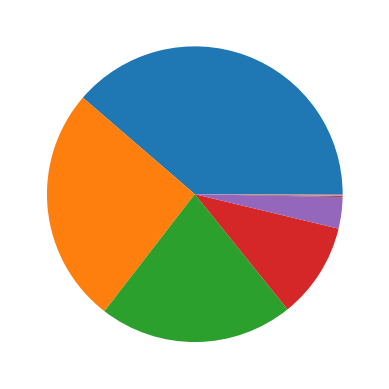

In [20]:
print(df["Education"].value_counts())
plt.pie(x=df["Marital_Status"].value_counts())

In [298]:
# Map categorial data into the numberical 
df["Education"] =df["Education"].map({"Basic":1,"Graduation":2,
                                      "Master":3,"2n Cycle":3,"PhD":4})
df["Marital_Status"] =df["Marital_Status"].map({"YOLO":1,"Absurd":1,
                                                "Alone":1,"Widow":1,
                                                "Divorced":1,"Single":1,
                                                 "Together":2 ,"Married":2})

In [299]:
# Convert year of birthday to age
def year_to_age(feature):
    return abs(feature - 2024) 

In [300]:
# Apply method on year_birthday feature
df["Year_Birth"] = df["Year_Birth"].apply(lambda x:year_to_age(x))

In [301]:
# Define a method to find maximum and minimum of each feature
def optimum(feature):
    for i in feature:
        if df[f"{i}"].dtype == "int64" or df[f"{i}"].dtype == "float64":
            print(i , min(df[f"{i}"]),"," ,max(df[f"{i}"]))
        else:
            print(i)

In [302]:
# Apply method on all features
optimum(list(df.columns))

Year_Birth 28 , 131
Education 1 , 4
Marital_Status 1 , 2
Income 1730.0 , 666666.0
Kidhome 0 , 2
Teenhome 0 , 2
Recency 0 , 99
MntWines 0 , 1493
MntFruits 0 , 199
MntMeatProducts 0 , 1725
MntFishProducts 0 , 259
MntSweetProducts 0 , 262
MntGoldProds 0 , 321
NumDealsPurchases 0 , 15
NumWebPurchases 0 , 27
NumCatalogPurchases 0 , 28
NumStorePurchases 0 , 13
NumWebVisitsMonth 0 , 20
Complain 0 , 1
Response 0 , 1


In [303]:
"""
Drop some unnecessery columns like complain,marital,education
             Becuase we want to reduce complexity 
""" 
df = df.drop(["Education","Marital_Status","Complain"],axis=1)

In [304]:
optimum(list(df.columns))

Year_Birth 28 , 131
Income 1730.0 , 666666.0
Kidhome 0 , 2
Teenhome 0 , 2
Recency 0 , 99
MntWines 0 , 1493
MntFruits 0 , 199
MntMeatProducts 0 , 1725
MntFishProducts 0 , 259
MntSweetProducts 0 , 262
MntGoldProds 0 , 321
NumDealsPurchases 0 , 15
NumWebPurchases 0 , 27
NumCatalogPurchases 0 , 28
NumStorePurchases 0 , 13
NumWebVisitsMonth 0 , 20
Response 0 , 1


In [305]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response'],
      dtype='object')

In [306]:
# Split data into X(features) and y(label)
X = df.drop('Response', axis=1)
y = df['Response']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [307]:
# Define the Deep neural network part
input_layer = Input(shape=(X_train.shape[1],))
hidden1 = Dense(64, activation='relu')(input_layer)
hidden2 = Dense(32, activation='relu')(hidden1)
output_nn = Dense(1, activation='sigmoid')(hidden2)

# Create the neural network model
nn_model = Model(inputs=input_layer, outputs=output_nn)


In [308]:
# Custom Fuzzy Layer Example
class FuzzyLayer(Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel',
                                      shape=(int(input_shape[1]), self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(FuzzyLayer, self).build(input_shape)

    def call(self, x):
        # Fuzzy logic operations (example: fuzzy membership functions)
        # Implement your fuzzy logic operations here
        fuzzy_output = tf.matmul(x, self.kernel)
        return fuzzy_output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

# Example of using the custom fuzzy layer
fuzzy_layer = FuzzyLayer(output_dim=1)(hidden2)


In [309]:
# Combine neural network and fuzzy logic parts
combined_output = Concatenate()([output_nn, fuzzy_layer])

# Final output layer for classification
output_layer = Dense(1, activation='sigmoid')(combined_output)

# Create the combined model
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
combined_model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 16)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 64)        │      1,088 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 32)        │      2,080 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 1)         │         33 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fuzzy_layer_6       │ (None, 1)         │         32 │ dense_21[0][0]    │
│ (FuzzyLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 2)         │          0 │ dense_22[0][0],   │
│ (Concatenate)       │                   │            │ fuzzy_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 1)         │          3 │ concatenate_5[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,236 (12.64 KB)

 Trainable params: 3,236 (12.64 KB)

 Non-trainable params: 0 (0.00 B)

In [310]:
# Train the model
history = combined_model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = combined_model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2629 - loss: 0.8368 - val_accuracy: 0.8378 - val_loss: 0.5175
Epoch 2/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.4472 - val_accuracy: 0.8378 - val_loss: 0.4107
Epoch 3/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.3726 - val_accuracy: 0.8378 - val_loss: 0.3731
Epoch 4/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8654 - loss: 0.3405 - val_accuracy: 0.8468 - val_loss: 0.3451
Epoch 5/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8547 - loss: 0.3461 - val_accuracy: 0.8626 - val_loss: 0.3287
Epoch 6/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8776 - loss: 0.3064 - val_accuracy: 0.8626 - val_loss: 0.3209
Epoch 7/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8697 - loss: 0.3047 - val_accuracy: 0.8626 - val_loss: 0.3141
Epoch 8/40
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.3032 - val_accuracy: 0.8671 - val_loss:

In [313]:
"""
Choose sample data to predict to find real accuracy of model
If we create a new input data then 
we scale it finaly we can get prediction result
"""
ls =list(y_test.index)[0:100]

prediction =[((combined_model.predict(X_test[j].reshape(1,16)))> 0.5).astype(int) for j in range(len(ls))]
real = [y_test[i] for i in ls]

k=0
for i in range(len(real)):
    if real[i] == prediction[i]:
        k += 1
    else:
        None
        
pred = (k/len(ls)) * 100

print("Finally Prediction :",pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━